## Visually inspected analysis

In [81]:
import os
import sys
import glob
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
from utility.utility import *
from utility.algorithm import *
from tqdm import tqdm
from scipy.signal import find_peaks

In [82]:
def import_files(path, dtype):
    '''
    Import files in the syntax that I used in the notebook. That is, choose the path that contains
    all the files, then obtain all dat and inf files as dictionaries that can be accessed by filename. 
    '''

    filename = "*.dat"
    files =  [ p for p in Path(path).glob(filename) ]
    file_dict = dict()
    for file in files:
        with open(file, 'rb') as f:
            # key of the dict is the filename, value the data.
            file_dict[os.path.basename(file)] = np.fromfile(f, np.float32)

    metadata_dict = dict()
    filename = "*.inf"
    files =  [ p for p in Path(path).glob(filename) ]
    for file in files:
        with open(file) as f:
            metadata_dict[os.path.basename(file)] = f.readlines()

    return file_dict, metadata_dict 

dataset_dat = 'L83080_SAP0_BEAM0_DM39.66.dat'
dataset_inf = 'L83080_SAP0_BEAM0_DM39.66.inf'

# skipped datasets: 61, 78

In [83]:
data_dict, metadata_dict = import_files(path="../../LOFAR_2e_jaars_RP_2022_voor_studenten/Data_Pulsar2", dtype="float32")
nbins_dict = dict()
dt_dict = dict()
mjd_dict = dict()
for key, val in metadata_dict.items():
    nbins_dict[key] = int(get_metadata_item(metadata_dict[key], 'Number of bins in the time series'))
    dt_dict[key] = float(get_metadata_item(metadata_dict[key], 'Width of each time series bin (sec)'))
    mjd_dict[key] = float(get_metadata_item(metadata_dict[key], 'Epoch of observation (MJD)'))

In [84]:
dt = list(dt_dict.values())[0]
nbins = list(nbins_dict.values())[0]
MJD = mjd_dict['L83080_SAP0_BEAM0_DM39.66.inf']
print( dt )
print( nbins )
print(MJD)

2.04799998755334e-05
8800000
56300.45492639893


In [85]:
first_dataset = np.array(data_dict[dataset_dat])
first_metadataset = metadata_dict[dataset_inf]

In [86]:
dt = list(dt_dict.values())[0]
nbins = list(nbins_dict.values())[0]

frequencies_first_dataset  = np.fft.fftfreq(nbins, dt)[1:]
transform_first_dataset = np.abs(np.fft.fft(first_dataset) / len(first_dataset))[1:]
#half_index = int(len(transform_first_dataset)/2)
#transform_first_dataset = transform_first_dataset[0:half_index]

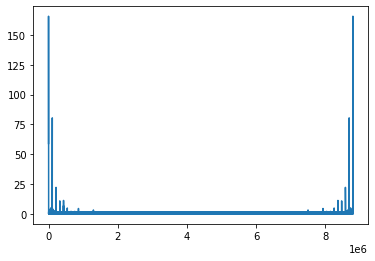

In [87]:
plt.plot(transform_first_dataset)

In [88]:
height_threshold = 2 # Just reading off an appropriate value from the graph
distance_between_peaks = 500
peaks_index, properties = find_peaks(transform_first_dataset, height=height_threshold, distance=distance_between_peaks)
peak_frequencies = [frequencies_first_dataset[i] for i in tqdm(peaks_index)]

100%|██████████| 56/56 [00:00<?, ?it/s]


In [89]:
nharmonics = 5
max_amplitudes = n_max_intensities(properties["peak_heights"], n=(2 * nharmonics)) # 2x since the graph is symmetric.
harmonics = n_max_frequencies( frequencies_first_dataset, transform_first_dataset,  max_amplitudes)

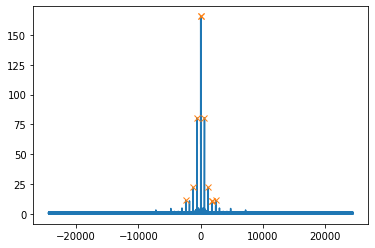

In [90]:
# Just change the height threshold above if we want less peaks to be marked.
plt.clf()
plt.plot(frequencies_first_dataset, transform_first_dataset,'-', harmonics, max_amplitudes,'x')

In [91]:
for peak in peak_frequencies:
    print(peak)

print('Julian day (modified):', MJD)

0.027743253009517896
2.8464577587765363
6.669478023488103
48.245516983551624
93.33385177462011
116.33300851951044
185.33047875418146
208.3296354990718
231.32879224396214
277.3271057337428
323.32541922352345
370.6609575083629
393.66011425325325
416.6592709981436
601.3849468367175
693.9863767318864
799.9822491800505
1018.6490207504686
1202.769893673435
1804.1603891607547
2399.924552937744
2405.545335997472
3006.9302828341897
3608.3152296709072
4209.705725158226
4799.860203176691
7197.753949994139
7201.748978427509
-7201.748978427509
-7197.753949994139
-4799.860203176691
-4209.705725158226
-3608.3152296709072
-3006.9302828341897
-2405.545335997472
-2399.924552937744
-1804.1603891607547
-1202.769893673435
-1018.6490207504686
-799.9822491800505
-693.9863767318864
-601.3849468367175
-416.6592709981436
-393.66011425325325
-370.6609575083629
-323.32541922352345
-277.3271057337428
-231.32879224396214
-208.3296354990718
-185.33047875418146
-116.33300851951044
-93.33385177462011
-48.2455169835516

In [92]:
# found peaks:
periods_datasets = []

#29
frequencies1 = [601.418238740329, (1202.836477480658/2), (1804.254716220987/3), (2405.672954961316/4), (3007.091193701645/5), (3608.509432441974/6)]
period1 = 1/(np.mean(frequencies1))
periods_datasets.append(period1)
#79
frequencies2 = [601.3960441379214, (1202.7920882758428/2), (1804.193681064366/3), (2405.5897252022874/4), (3006.9857693402087/5), (3608.38181347813/6)]
period2 = 1/(np.mean(frequencies2))
periods_datasets.append(period2)
#80
frequencies3 = [601.3849468367175, (1202.769893673435/2), (1804.1603891607547/3), (2405.545335997472/4), (3006.9302828341897/5), (3608.3152296709072/6), (4209.705725158226/7), (4799.860203176691/8)]
period3 = 1/(np.mean(frequencies3))
periods_datasets.append(period3)
#81
frequencies4 = [601.3849468367175, (1202.769893673435/2), (1804.1492918595509/3), (2405.5342386962684/4), (3006.919185532986/5), (3608.3041323697034/6)]
period4 = 1/(np.mean(frequencies4))
periods_datasets.append(period4)
#82
frequencies5 = [601.3904954873194, (1202.7809909746388/2), (1804.1714864619585/3), (2405.5619819492777/4), (3006.9524774365973/5), (3608.342972923917/6), (4209.733468411237/7)]
period5 = 1/(np.mean(frequencies5))
periods_datasets.append(period5)
#83
frequencies6 = [601.4015927885233, (1202.8087342276485/2), (1804.2103270161717/3), (2405.617468455297/4), (3007.01906124382/5), (3608.426202682945/6)]
period6 = 1/(np.mean(frequencies6))
periods_datasets.append(period6)
#84
frequencies7 = [601.418238740329, (1202.84202613126/2), (1804.2602648715888/3), (2405.68405226252/4), (3007.1022910028487/5)]
period7 = 1/(np.mean(frequencies7))
periods_datasets.append(period7)
#85
frequencies8 = [601.4348846921347, (1202.8697693842694/2), (1804.2991054258023/3), (2405.733990117937/4), (3007.1688748100714/5), (3608.6037595022062/6)]
period8 = 1/(np.mean(frequencies8))
periods_datasets.append(period8)
#86
frequencies9 = [601.4404333427366, (1202.8808666854732/2), (1804.3213000282099/3), (2405.7561847203447/4), (3007.196618063081/5),]
period9 = 1/(np.mean(frequencies9))
periods_datasets.append(period9)
#87
frequencies10 = [601.4348846921347, (1202.8697693842694/2), (1804.310202727006/3), (2405.745087419141/4), (3007.179972111275/5), (3608.61485680341/6)]
period10 = 1/(np.mean(frequencies10))
periods_datasets.append(period10)
#88
frequencies11 = [601.4293360415328, (1202.8531234324637/2), (1804.2824594739964/3), (2405.7062468649274/4)]
period11 = 1/(np.mean(frequencies11))
periods_datasets.append(period11)


# found MJD's
list_MJD =  list( mjd_dict.values() )
# but we skip the following datasets for now:
del list_MJD[1] # skip dataset 2
del list_MJD[2] # skip dataset 3
del list_MJD[-1] # skip dataset 14


print(len(list_MJD))
print(len(periods_datasets))
print(periods_datasets)
print(list_MJD)


11
11
[0.0016627364046931813, 0.0016627953391468015, 0.0016633109334621597, 0.0016628308808149732, 0.0016628131097909664, 0.0016627767166011553, 0.0016627310867354046, 0.0016626928137830803, 0.0016626764262373586, 0.0016626879562865453, 0.001662710837899844]
[56299.364628335425, 56300.48270470806, 56300.45492639893, 56300.44103724313, 56300.42714808649, 56300.413258929024, 56300.39936977075, 56300.38548061164, 56300.37159145176, 56300.35770229113, 56300.34381312978]


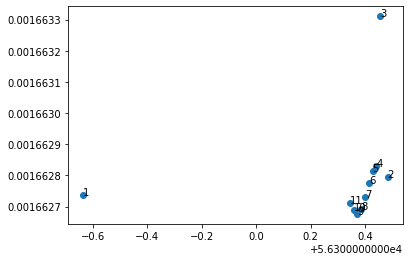

In [93]:
plt.scatter(list_MJD, periods_datasets)

annotations = range(1, len(periods_datasets) + 1)

for i, label in enumerate(annotations):
    plt.annotate(label, (list_MJD[i], periods_datasets[i]))

## Repeating the analysis, but automized.

The automatisation of what we did above is straightforward in principle, it is a matter of creating array versions of all the relevant variables, with the $i$ th element corresponding to the $i$ th dataset. It is then a matter of bookkeeping and of making sure we translate everything correctly.

In [94]:
list_mjd2 =  list( mjd_dict.values() )

In [95]:
frequencies = []
transforms = []
for val in data_dict.values():
    frequencies.append( ( np.fft.fftfreq(nbins, dt) )[1:] )
    transforms.append( np.abs( ( np.fft.fft(val) / len(val) )[1:] ) )  # division is to normalize the transform.

For now we still ignore datasets 2,3 and 14.

In [96]:
#del frequencies[2]
#del frequencies[3]
#del frequencies[-1]

In [97]:
# TODO: It would be great to create numpy arrays to do this step immediately two cells above,
# but the delete operator is not defined for numpy arrays, so we only convert to numpy arrays afterwards.
frequencies = np.array(frequencies)
transforms = np.array(transforms)

In [98]:
#for f, t in zip(frequencies, transforms):
#    plt.plot(f, np.abs(t) )
#    plt.xlim(0) # to remove the symmetry from the plot.
#    plt.figure()

In [99]:
height_threshold = 2 # Just reading off an appropriate value from the graph
distance_between_peaks = 500

In [100]:
peak_indices = []
peak_heights = []
peak_frequencies = []
for i, (f, t) in enumerate( zip( frequencies, transforms ) ):
    indices, props = find_peaks(t, height=height_threshold, distance=distance_between_peaks)
    peak_indices.append(indices)
    peak_heights.append(props["peak_heights"])
    
    peak_frequencies.append( [f for i in tqdm(peak_indices[i])] )

peak_indices = np.array( peak_indices )
peak_heights = np.array( peak_heights )
# NOTE: converting peak_frequencies to np array takes too much memory.
#peak_frequencies = np.array( peak_frequencies )
print(type(peak_indices))
print(type(peak_heights))
print(type(peak_frequencies))

100%|██████████| 36/36 [00:00<00:00, 32953.94it/s]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>



C:\Users\bvptr\AppData\Local\Temp/ipykernel_22296/1825242877.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_indices = np.array( peak_indices )
C:\Users\bvptr\AppData\Local\Temp/ipykernel_22296/1825242877.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_heights = np.array( peak_heights )


In [267]:
nharmonics = 5

In [268]:
max_amplitudes = []
harmonics = []

for i, (f, t, h) in enumerate( zip( frequencies, transforms, peak_heights) ):
    max_amplitudes.append( n_max_intensities(peak_heights[i], n=(2 * nharmonics)) ) # 2x since the graph is symmetric.
    harmonics.append( n_max_frequencies( f, t,  max_amplitudes[i]) )

max_amplitudes = np.array( max_amplitudes )
harmonics = np.array( harmonics )

In [269]:
#for f, t, h, a in zip( frequencies, transforms, harmonics, max_amplitudes):
#    plt.clf()
#    plt.plot(f, t,'-', h, a,'x')
#    plt.figure()

We now do a series of operations on our found harmonics to calculate other quantities

Let us discard negative (unphysical) harmonics.

In [270]:
harmonics = np.array( [ list( filter( lambda el: el > 0, x)  ) for x in harmonics ] )

C:\Users\bvptr\AppData\Local\Temp/ipykernel_22296/1231146584.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harmonics = np.array( [ list( filter( lambda el: el > 0, x)  ) for x in harmonics ] )


Discard frequencies that certainly are not harmonics.

In [271]:
estimated_fundamental = 600
harmonics = np.array( [ list( filter( lambda el: el > estimated_fundamental, x)  ) for x in harmonics ] )

C:\Users\bvptr\AppData\Local\Temp/ipykernel_22296/3747825511.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harmonics = np.array( [ list( filter( lambda el: el > estimated_fundamental, x)  ) for x in harmonics ] )


Now, we have got a pretty great idea of what is the fundamental and what is the $i$ th harmonic. We use this knowledge to now accurately determine the period.

We use the following rationale $\left( i \text{th harmonic} \right) = \left( i \cdot \text{estimated fundamental} \pm \varepsilon \right)$

Better still is to go through our found harmonics and determine which harmonic we are dealing with too.

I am not sure if we want to do the following operation

In [272]:
#harmonics = [ list( set( x ) ) for x in harmonics ] # unique values

Whatever is None we want to set to zero.

In [273]:
def none_to_zero_list(lst):
    return [ [0] if not x else x for x in lst ]

In [274]:
harmonics = none_to_zero_list(harmonics)

In [275]:
#harmonics = [ list( filter(None, x)  ) for x in harmonics ] # remove emptiness from the inner lists.
#harmonics = list( filter(None, harmonics)  ) # remove emptiness from the outer list.

In principle it does not matter in what order we average here. All we are interested in is that the $i$ th harmonic is divided by $i$.

In [276]:
def harmonic_division(harmonic, estimated_fundamental, epsilon=10):
    hard_coded_limit_factor = 100
    # start the enumeration at i = 1. 
    for i, x in enumerate( range(estimated_fundamental, hard_coded_limit_factor * estimated_fundamental, estimated_fundamental ), 1 ):
        if x - epsilon <= harmonic <= x + epsilon:
            return harmonic / i

def do_harmonic_division_on(harmonics):
    new_harmonics = []
    for x in harmonics:
        a = []
        for y in x:
            a.append( harmonic_division(y, estimated_fundamental) )
        new_harmonics.append(a)
    return new_harmonics

harmonics = do_harmonic_division_on(harmonics)

In [277]:
def none_to_zero(lst):
    return [ 0 if not x else x for x in lst ]

In [278]:
harmonics = [ none_to_zero(x) for x in harmonics ]

In [279]:
periods, errors = np.transpose( [ period_and_error(x) for x in harmonics ] )

c:\Users\bvptr\academia\physics\year2\research_practicum\pulsar_analysis\src\script\utility\utility.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / (mean := np.mean(frequencies)), np.std(frequencies) / mean**2
c:\Users\bvptr\academia\physics\year2\research_practicum\pulsar_analysis\src\script\utility\utility.py:41: RuntimeWarning: invalid value encountered in double_scalars
  return 1 / (mean := np.mean(frequencies)), np.std(frequencies) / mean**2


In [280]:
def nan_to_zero(a):
    return np.where(np.isnan(a), 0, a)
def inf_to_zero(a):
    return np.where(np.isinf(a), 0, a)

In [315]:
print( periods )
print( errors )

[0.00166274 0.00332538        inf 0.0016628  0.00166283 0.00166283
 0.00166281 0.00166278 0.00166273 0.00166269 0.00166268 0.00166269
 0.00166271        inf]
[2.35309766e-09 2.34352287e-09 2.22914722e-09 1.98804890e-19
 3.18894858e-09 3.46808484e-09 2.17267834e-09 0.00000000e+00
 2.28219543e-09 3.61563499e-09]


In [282]:
#periods = inf_to_zero(periods)
#errors = nan_to_zero(errors)

In [283]:
print( len(list_mjd2))
print( len(periods))

14
14


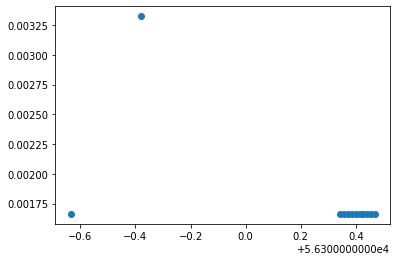

In [284]:
plt.scatter(list_mjd2, periods)

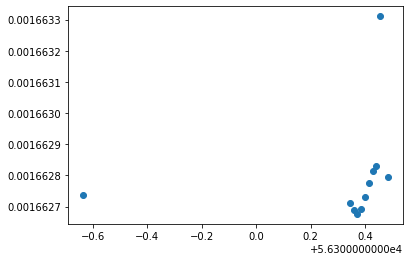

In [285]:
plt.scatter(list_MJD, periods_datasets)

In [286]:
list_mjd2

[56299.364628335425,
 56299.61949397883,
 56300.48270470806,
 56300.4688155539,
 56300.45492639893,
 56300.44103724313,
 56300.42714808649,
 56300.413258929024,
 56300.39936977075,
 56300.38548061164,
 56300.37159145176,
 56300.35770229113,
 56300.34381312978,
 56300.32992396778]

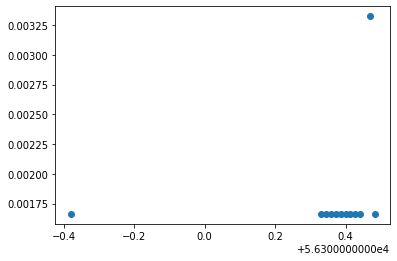

In [287]:
plt.scatter(list( reversed( sorted(list_mjd2) ) ), periods)

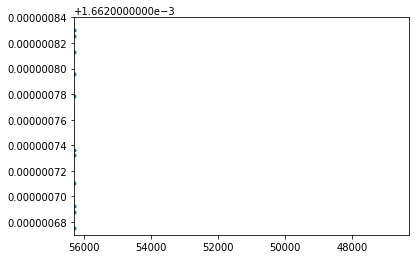

In [288]:
plt.plot(list_mjd2, periods, '.')
plt.xlim(0.20 + 5.63 * 10 **4, 0.475 + 4.63 * 10 **4)
plt.ylim(.00166267, .00166284)
#plt.yticks( np.linspace(.00166267, .00166284, 20) )
plt.ticklabel_format(style = 'plain')

In [289]:
phase = 0
frequency = 1 / 0.16
offset = 6 * 10 ** -7 + 1.662 * 10 ** -3
amplitude = - 8 * 10 ** -7 # Note the negative.

In [290]:
x = np.linspace(0.34 + 5.63 * 10 **4, 0.46 + 5.63 * 10 **4, 50)
y = amplitude * np.sin(2 * np.pi * frequency * x + phase) + offset

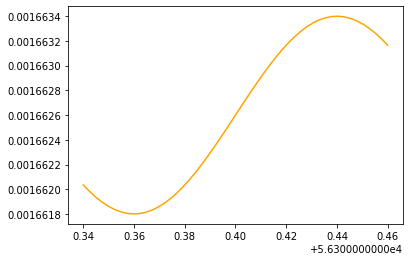

In [291]:
plt.plot(x, y, '-', color='orange')
plt.ticklabel_format(style = 'plain')

Rembrand's Method

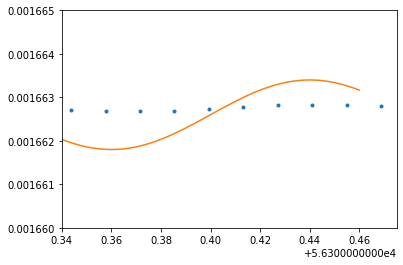

In [292]:
plt.xlim(0.34 + 5.63 * 10 **4, 0.475 + 5.63 * 10 **4)
#plt.ylim(.00156267, .00176284)
plt.ylim(.001660, .001665)
plt.ticklabel_format(style = 'plain')

plt.plot(list_mjd2, periods, '.')
plt.plot(x, y, '-')

this should suffice for an estimate of the begin parameters.

In [359]:
from lmfit import models, Parameters

In [294]:
list_mjd2

[56299.364628335425,
 56299.61949397883,
 56300.48270470806,
 56300.4688155539,
 56300.45492639893,
 56300.44103724313,
 56300.42714808649,
 56300.413258929024,
 56300.39936977075,
 56300.38548061164,
 56300.37159145176,
 56300.35770229113,
 56300.34381312978,
 56300.32992396778]

In [295]:
x = list_mjd2
y = periods

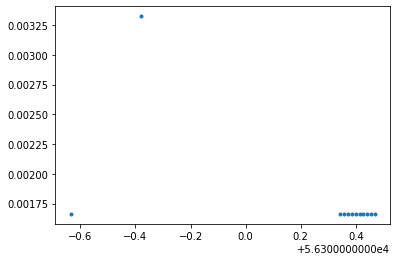

In [296]:
plt.plot(x, y, '.')

In [297]:
x

[56299.364628335425,
 56299.61949397883,
 56300.48270470806,
 56300.4688155539,
 56300.45492639893,
 56300.44103724313,
 56300.42714808649,
 56300.413258929024,
 56300.39936977075,
 56300.38548061164,
 56300.37159145176,
 56300.35770229113,
 56300.34381312978,
 56300.32992396778]

In [298]:
y

array([0.00166274, 0.00332538,        inf, 0.0016628 , 0.00166283,
       0.00166283, 0.00166281, 0.00166278, 0.00166273, 0.00166269,
       0.00166268, 0.00166269, 0.00166271,        inf])

In [299]:
errors

array([0.00000000e+00, 3.32538077e-03,            nan, 2.35309766e-09,
       2.34352287e-09, 2.22914722e-09, 1.98804890e-19, 3.18894858e-09,
       3.46808484e-09, 2.17267834e-09, 0.00000000e+00, 2.28219543e-09,
       3.61563499e-09,            nan])

In [300]:
# Let's try to fit w/o these points first.
x = np.delete( list_mjd2, [0,1,2,13] )
y = np.delete( periods, [0,1,2,13] )
errors = np.delete( errors, [0,1,2,13] )

In [301]:
len( errors )

10

We need to fix the unsortedness of the data.

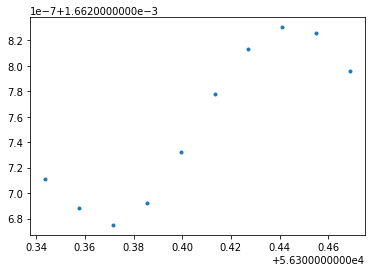

In [335]:
plt.plot(x, y, '.')

In [337]:
print( [ el for el in x ] )
print( [ el for el in y ] )

[56300.4688155539, 56300.45492639893, 56300.44103724313, 56300.42714808649, 56300.413258929024, 56300.39936977075, 56300.38548061164, 56300.37159145176, 56300.35770229113, 56300.34381312978]
[0.0016627957592090326, 0.00166282563896264, 0.0016628302415629193, 0.0016628131097909669, 0.0016627781654799023, 0.0016627323139534107, 0.0016626925155149316, 0.0016626750457100386, 0.0016626881480292916, 0.001662710837899844]


## Fixed calculation of the speed, cf. MMA

In [331]:
p0 = ( y[4] + y[5] ) / 2
p = ( y[7] + y[8] ) / 2
c = 3 * 10 ** 8 

In [334]:
v = c * ( p / p0 - 1) 
print(f"{v * 10 ** -3} in km / s")

-13.28689488969692 in km / s


In [303]:
errors2 = np.where(errors != 0, errors, 0.5 * 10 ** -8) # Settings it to our precision.

In [341]:
print([el for el in errors2])

[2.353097663263867e-09, 2.3435228659575588e-09, 2.2291472249414805e-09, 1.9880488969239098e-19, 3.1889485827440945e-09, 3.46808484243367e-09, 2.1726783415015955e-09, 5e-09, 2.2821954279209845e-09, 3.615634992325844e-09]


In [304]:
# TODO: Add errors as weights.
sin = lambda x, amplitude, frequency, offset, phase: amplitude * np.sin(2 * np.pi * frequency * x + phase) + offset # x needs to be given first.
model_curve = models.Model(sin, name='sin')

fit = model_curve.fit(data=y, x=x, amplitude=amplitude, frequency=frequency, offset=offset, phase=3, weights=1/errors2)
fit

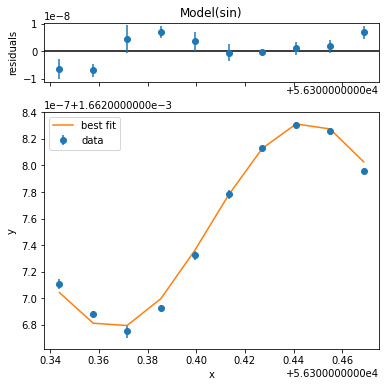

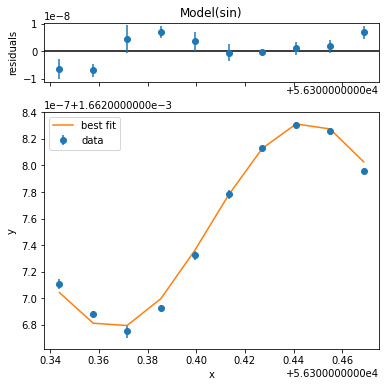

In [305]:
fit.plot()

## Attempt ot fit using curvefit

In [306]:
from scipy import optimize
from IPython.display import display, Math
def sine(x, dist, amp, omega, phi):
    return dist + amp * np.cos(omega * x + phi)

In [307]:
len( list_mjd2)
len(errors)

10

```
name	value	initial value	min	max	vary
amplitude	7.7591e-08	-8e-07	-inf	inf	True
frequency	6.25007714	6.25	-inf	inf	True
offset	0.00166275	0.0016625999999999998	-inf	inf	True
phase	-24.3685230	3	-inf	inf	True
```

In [308]:
phi_guess = -24.3685230
omega_guess = 2 * np.pi * 6.25007714
dist_guess = 0.00166275
amp_guess = 7.7591e-08

In [309]:
params, params_covariance = optimize.curve_fit(sine, x, y, p0= [dist_guess, amp_guess, omega_guess, phi_guess], sigma=errors, method='lm')
print( params )
print( params_covariance )
print( np.sqrt( np.diag(params_covariance) ) )

[ 1.66275000e-03  7.75910000e-08  3.92703929e+01 -2.43685230e+01]
[[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]
[inf inf inf inf]


C:\Users\bvptr\anaconda3\envs\pulsar\lib\site-packages\scipy\optimize\minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
C:\Users\bvptr\anaconda3\envs\pulsar\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [310]:
B, A, omega, phi = params

In [311]:
#B=0.00166275
#A=-7.81285 * 10 ** -8
#omega=.574299
#phi=3.12734

In [312]:
xx = np.linspace(0.34 + 5.63 * 10 **4, 0.46 + 5.63 * 10 **4, 50)
yy = A * np.sin(omega * xx + phi) + B

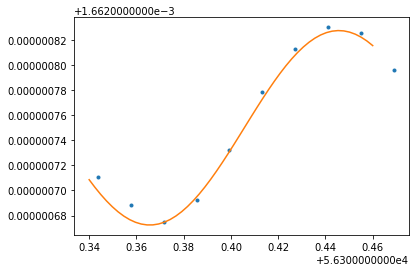

In [352]:
plt.plot(x, y, '.')
plt.plot(xx, yy)
plt.ticklabel_format(style = 'plain')

## Repeating `lmfit` with MMA found parameters

In [372]:
sin = lambda x, amplitude, omega, offset, phase: amplitude * np.sin(omega* x + phase) + offset # x needs to be given first.
model_curve = models.Model(sin, name='sin')

#params = Parameters()
#params.add('offset', value=.00166275, vary=True)
#params.add('amplitude', value=7.81285*10 ** -8, vary=True)
#params.add('omega', value=41.3487, vary=True)
#params.add('phase', value=-117036, vary=True)
#fit = model_curve.fit(y, params, x=x, weights=1/errors2)

#offset =  0.00166275
#amplitude = 7.81285*10 ** -8
#omega = 41.3487
#phase = -117036

fit = model_curve.fit(data=y, x=x, amplitude=amplitude, omega=omega, offset=offset, phase=3, weights=1/errors2)
fit

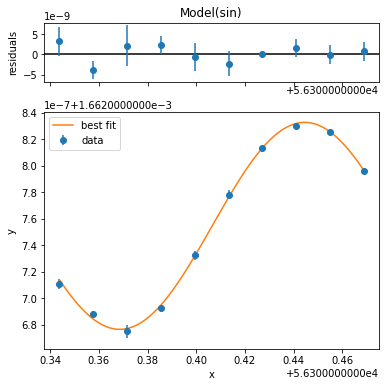

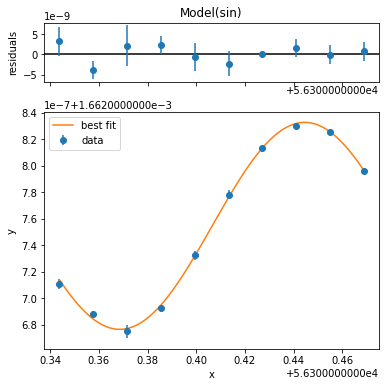

In [373]:
fit.plot(numpoints=100000)